<a href="https://colab.research.google.com/github/yeonsooooooo/example_fine_tuning_pytorch/blob/main/4_Heuristic_Safe_Guard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build with AI United - Heuristic Safe-Guard

https://gdg.community.dev/events/details/google-gdg-golang-korea-presents-build-with-ai-united/

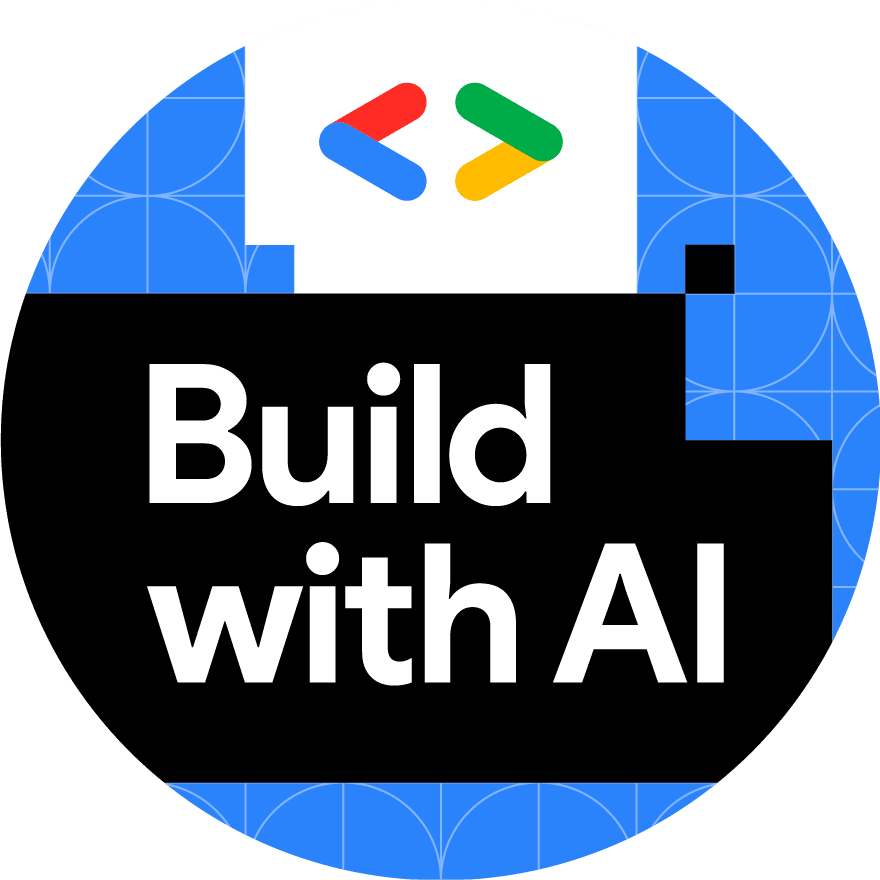

In [ ]:
!pip install -q -U \
    google-generativeai \
    langchain-core \
    langchain-community \
    langchain-google-genai \
    playwright \
    html2text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 803.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
!playwright install

155.3 MiB [] 0% 10.3s155.3 MiB [] 0% 34.2s155.3 MiB [] 0% 15.3s155.3 MiB [] 0% 13.9s155.3 MiB [] 0% 10.6s155.3 MiB [] 0% 9.0s155.3 MiB [] 1% 8.4s155.3 MiB [] 1% 8.2s155.3 MiB [] 1% 7.9s155.3 MiB [] 1% 7.8s155.3 MiB [] 2% 7.8s155.3 MiB [] 3% 7.7s155.3 MiB [] 3% 7.4s155.3 MiB [] 3% 6.6s155.3 MiB [] 4% 6.4s155.3 MiB [] 4% 6.6s155.3 MiB [] 5% 5.9s155.3 MiB [] 5% 5.8s155.3 MiB [] 6% 5.5s155.3 MiB [] 6% 5.3s155.3 MiB [] 7% 4.9s155.3 MiB [] 8% 4.7s155.3 MiB [] 8% 4.6s155.3 MiB [] 9% 4.5s155.3 MiB [] 9% 4.6s155.3 MiB [] 10% 4.4s155.3 MiB [] 10% 4.3s155.3 MiB [] 11% 4.1s155.3 MiB [] 12% 4.0s155.3 MiB [] 12% 3.9s155.3 MiB [] 13% 3.8s155.3 MiB [] 14% 3.7s155.3 MiB [] 15% 3.6s155.3 MiB [] 15% 3.5s155.3 MiB [] 16% 3.5s155.3 MiB [] 17% 3.4s155.3 MiB [] 18% 3.3s155.3 MiB [] 19% 3.1s155.3 MiB [] 20% 3.0s155.3 MiB [] 20% 2.9s155.3 MiB [] 21% 2.8s155.3 MiB [] 22% 2.7s155.3 MiB [] 23% 2.6s155.3 MiB [] 24% 2.5s155.3 MiB [] 25% 2.5s155.3 MiB [] 26% 2.5s155.3 MiB [] 27% 2.4s155.3 MiB [] 28% 2.4s155.3 MiB []

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
from operator import itemgetter

import google.generativeai as genai
import requests
import json
from IPython.display import display, Markdown, JSON
from langchain_google_genai import GoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser, JsonOutputParser
from langchain_community.document_loaders import AsyncHtmlLoader
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.prompts import PromptTemplate, ChatPromptTemplate
from langchain_community.document_transformers import Html2TextTransformer
from google.colab import userdata

In [ ]:
GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")
genai.configure(api_key=GEMINI_API_KEY)

In [ ]:
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/text-embedding-004
models/aqa


In [ ]:
model = genai.GenerativeModel(model_name="models/gemini-1.5-pro-latest")

In [ ]:
class URLValidityResponse(BaseModel):
    url: str = Field(description="an original content url, this is exactly same as [URL].")
    statement: str = Field(description="a sentence that describes the element of the claim.")
    reason: str = Field(description="an explanation as to why this element of the claim is valid or invalid.")
    validity: bool = Field(description="final verified result, the truthfulness of the claim based on the reason provided. Set this key's value to either true or false, where true indicates that the claim is valid.")

In [ ]:

llm = GoogleGenerativeAI(model="models/gemini-1.5-pro-latest", google_api_key=GEMINI_API_KEY)
parser = JsonOutputParser(pydantic_object=URLValidityResponse)
prompt = PromptTemplate.from_template(
    """
    Please verification the [CONTENT] is covering [QUERY] request in {language}.
    The content requested in [QUERY] must be included semantically and content-wise in [CONTENT].

    Just because user requested a link, there is no need to compare [CONTENT] to see if it is a link.

    [URL]
    {url}

    [RULE]
    {format_instructions}

    [CONTENT]
    {content}

    [QUERY]
    {query}
    """.strip(),
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

In [ ]:
def url_validator(url: str, query: str, language: str) -> URLValidityResponse:
    loader = AsyncHtmlLoader([url])
    html2text = Html2TextTransformer()

    docs = loader.load()
    docs_transformed = html2text.transform_documents(docs)

    if len(docs_transformed) == 0:
        return URLValidityResponse(statement="", reason="", validity=False)

    web_content = docs_transformed[0].page_content

    chain = (
        {
            "url": itemgetter("url"),
            "content": itemgetter("content"),
            "query": itemgetter("query"),
            "language": itemgetter("language")
        }
        | prompt
        | llm
        | parser
    )

    return chain.invoke({
        "url": url,
        "content": web_content,
        "query": query,
        "language": language
    })

In [ ]:
query = "Generative AI, LLM 주제에 대한 Hallucination을 다룬 문서를 보고 싶어."
response = model.generate_content(
    [
        f"""
        {query}

        arXiv link 5개를 JSON list 포맷으로 제공해줘
        설명은 모두 생략해.

        Example:
        [\"link1\", \"link2\", \"link3\"]

        Output:
        """,
    ],
    generation_config={"response_mime_type": "application/json"},
)
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': '[\n"https://arxiv.org/abs/2307.09741",\n"https://arxiv.org/abs/2307.08134",\n"https://arxiv.org/abs/2304.07316",\n"https://arxiv.org/abs/2304.04239",\n"https://arxiv.org/abs/2302.06718"\n]\n'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [{'category': 9, 'probability': 1, 'blocked': False}, {'category': 8, 'probability': 1, 'blocked': False}, {'category': 7, 'probability': 1, 'blocked': False}, {'category': 10, 'probability': 1, 'blocked': False}], 'token_count': 0, 'grounding_attributions': []}]}),
)

In [ ]:
links = json.loads(response.candidates[0].content.parts[0].text)

In [ ]:
link_validation_results = [url_validator(url=link, query=query, language="korean") for link in links]
link_validation_results

Fetching pages: 100%|##########| 1/1 [00:00<00:00,  1.23it/s]


[{'url': 'https://arxiv.org/abs/2307.09741',
  'statement': 'The provided document discusses the concept of "Hallucination" within the context of Generative AI and Large Language Models (LLMs).',
  'reason': 'The abstract and content provided do not mention or relate to Generative AI, LLMs, or the concept of Hallucination. The focus of the document is on number theory, specifically investigating the properties of k-Göbel sequences.',
  'validity': False},
 {'url': 'https://arxiv.org/abs/2307.08134',
  'statement': 'The provided document discusses the concept of hallucination in the context of generative AI and large language models (LLMs).',
  'reason': "The provided document focuses on 'Additivity of symmetric and subspace designs' within the field of combinatorics, which is unrelated to generative AI, LLMs, or the concept of hallucination.",
  'validity': False},
 {'url': 'https://arxiv.org/abs/2304.07316',
  'statement': 'The provided document discusses generative AI or large langua

In [ ]:
valid_links = [result["url"] for result in link_validation_results if result["validity"] is True]
valid_links

[]